In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [13]:
pd.set_option("display.max_columns", 50)

# Win expectancy

## IPL games

### Import pre-processed all IPL data

In [11]:
df = pd.read_csv("data/df_kaggleAllIpl_preprocessed.csv")
del df['Unnamed: 0']

In [14]:
df

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [15]:
len(df)

150460

### Ball by ball win expectancy

### All IPL games

In [122]:
maxRunRateBins = 300
maxBalls = 240

numOccurrences  = np.ndarray(shape=(maxBalls,maxRunRateBins,11), dtype='float')
numTeamChaseWin = np.ndarray(shape=(maxBalls,maxRunRateBins,11), dtype='float')

for m in df['match_id'].unique():
    
    if m%100==0:
        print(m)
        
    dfm = df[df['match_id']==m]
    
    if dfm['result'].unique()[0]=="normal" and dfm['dl_applied'].unique()[0]==0: ### Ignore ties and matches with DL method
        
        ### Count number of instances when team chasing wins the game
        teamChase = dfm[dfm['inning']==2]['batting_team'].unique()[0]
        winner = dfm['winner'].unique()[0]
        teamChaseWin = 1 if (teamChase==winner) else 0

        ball = 0
        firstInningsRuns = 0
        secondInningsRuns = 0
        firstInningsWickets = 0
        secondInningsWickets = 0
        
        for b in range(len(dfm)):  ### For each ball in the match
            
            innings = dfm.iloc[b]['inning']
            
            if dfm.iloc[b]['wide_runs']==0 and dfm.iloc[b]['noball_runs']==0:  ### Do not count wides/no-balls
                ball += 1
              
            if innings==2 and ball==121:    ### Start of second innings
                target = firstInningsRuns+1
                numBallsRemaining = maxBalls/2
                
            if ball!=0 and innings==1:    ### First innings
                firstInningsRuns += dfm.iloc[b]['total_runs']
                runRate = int(np.around(firstInningsRuns/ball)*10)
                if not pd.isnull(dfm.iloc[b]['player_dismissed']):
                    firstInningsWickets += 1
                    
                numOccurrences[ball, runRate, firstInningsWickets] += 1
                numTeamChaseWin[ball, runRate, firstInningsWickets] += teamChaseWin
                
            elif innings==2 and numBallsRemaining>1:  ### Second innings   
                numBallsRemaining = maxBalls-ball
                numRunsRemaining = target-secondInningsRuns
                secondInningsRuns += dfm.iloc[b]['total_runs']
                requiredRunRate = int(np.around(numRunsRemaining/numBallsRemaining)*10)
                if not pd.isnull(dfm.iloc[b]['player_dismissed']):
                    secondInningsWickets += 1
            
                if requiredRunRate >= maxRunRateBins:
                    requiredRunRate = maxRunRateBins-1
                numOccurrences[ball, requiredRunRate, secondInningsWickets] += 1
                numTeamChaseWin[ball, requiredRunRate, secondInningsWickets] += teamChaseWin
            

100
200
300
400
500
600


In [131]:
maxRunRateBins = 300
maxBalls = 240

we1 = [0] * 240
we1[0] = 0.5

for m in [1]: #df['match_id'].unique():
    
    if m%100==0:
        print(m)
        
    dfm = df[df['match_id']==m]
    
    if dfm['result'].unique()[0]=="normal" and dfm['dl_applied'].unique()[0]==0: ### Ignore ties and matches with DL method
        
        ### Count number of instances when team chasing wins the game
        teamChase = dfm[dfm['inning']==2]['batting_team'].unique()[0]
        winner = dfm['winner'].unique()[0]
        teamChaseWin = 1 if (teamChase==winner) else 0

        ball = 0
        firstInningsRuns = 0
        secondInningsRuns = 0
        firstInningsWickets = 0
        secondInningsWickets = 0
        
        for b in range(len(dfm)):  ### For each ball in the match
            
            innings = dfm.iloc[b]['inning']
            
            if dfm.iloc[b]['wide_runs']==0 and dfm.iloc[b]['noball_runs']==0:  ### Do not count wides/no-balls
                ball += 1
              
            if innings==2 and ball==121:    ### Start of second innings
                target = firstInningsRuns+1
                numBallsRemaining = maxBalls/2
                
            if ball!=0 and innings==1:    ### First innings
                firstInningsRuns += dfm.iloc[b]['total_runs']
                runRate = int(np.around(firstInningsRuns/ball)*10)
                if not pd.isnull(dfm.iloc[b]['player_dismissed']):
                    firstInningsWickets += 1
                    
                we1[ball] = we[ball, runRate, firstInningsWickets]
                
            elif innings==2 and numBallsRemaining>1:  ### Second innings   
                numBallsRemaining = maxBalls-ball
                numRunsRemaining = target-secondInningsRuns
                secondInningsRuns += dfm.iloc[b]['total_runs']
                requiredRunRate = int(np.around(numRunsRemaining/numBallsRemaining)*10)
                if not pd.isnull(dfm.iloc[b]['player_dismissed']):
                    secondInningsWickets += 1
            
                if requiredRunRate >= maxRunRateBins:
                    requiredRunRate = maxRunRateBins-1
                    
                we1[ball] = we[ball, requiredRunRate, secondInningsWickets]
            

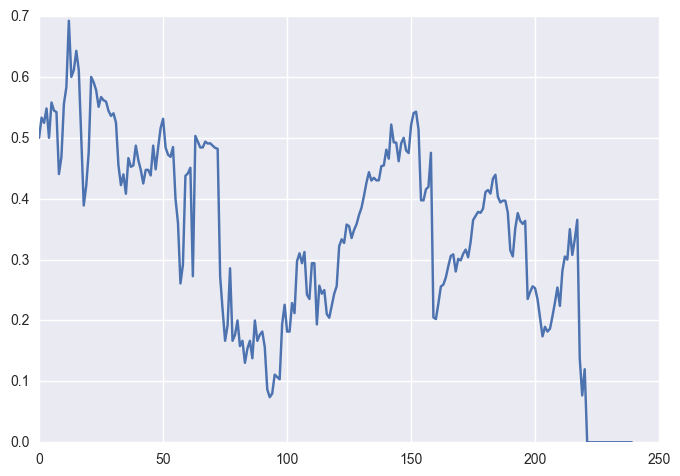

In [132]:
plt.plot(we1)